<a href="https://colab.research.google.com/github/harison26/Harison-naanmudhalvan/blob/main/Copy_of_Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## importing datasets to AQI
df= pd.read_csv('city_day.csv.zip')


In [ ]:
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.dtypes

,0
City,object
Date,object
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
 16  AQI_Level   29531 non-null  object 
dtypes: float64(13), object(4)
memory usage: 3.8+ MB


In [ ]:
print(df.describe())

              PM2.5          PM10            NO           NO2           NOx  \
count  19532.000000  19719.000000  19709.000000  19774.000000  19831.000000   
mean      38.470856     77.179953      4.583251     22.307109     15.504534   
std       29.814409     49.693148      8.777796     23.156418     16.725194   
min        0.250000      1.000000      0.030000      0.100000      0.000000   
25%       16.000000     39.500000      1.450000      8.120000      6.100000   
50%       28.750000     64.750000      2.250000     14.600000      9.950000   
75%       54.250000    105.000000      4.020000     25.800000     17.750000   
max      308.750000    559.250000    303.500000    198.050000    321.600000   

                NH3            CO           SO2            O3       Benzene  \
count  19704.000000  18847.000000  19181.000000  19713.000000  19229.000000   
mean      12.104569      0.625098     14.011072     38.013383      0.621133   
std        6.643923      0.534189     12.890329    

Filtering based on AQI <= 50 as a proxy for 'Good gas'.


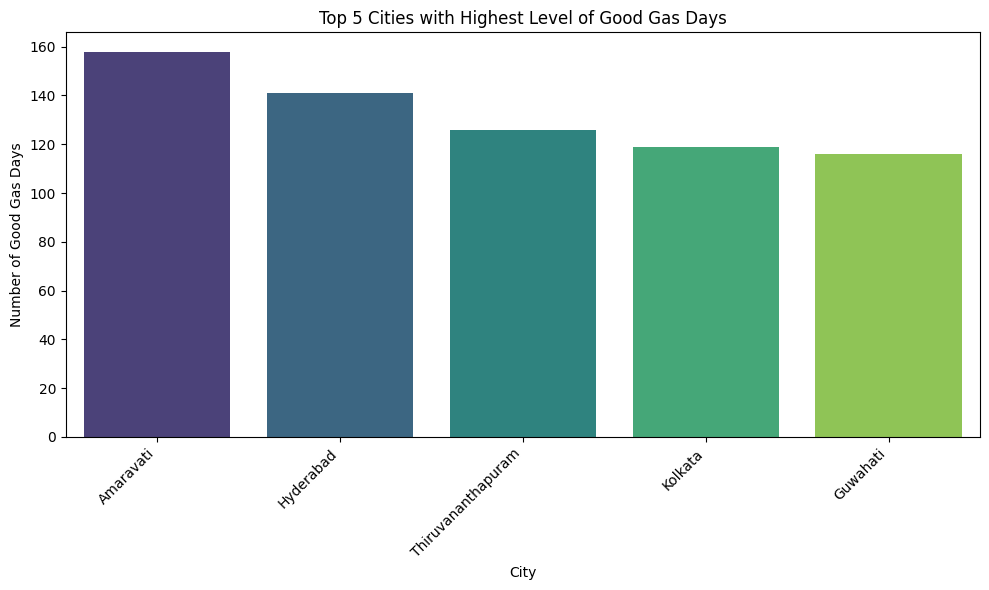

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for 'Good' AQI category (assuming 'AQI_Category' column exists and indicates this)
# If 'AQI_Category' doesn't exist, you might need to define what constitutes 'Good gas' based on AQI or other columns.
# For this example, let's assume 'AQI_Category' is available and 'Good' is a valid category.
# If not, you'll need to adjust this filtering logic.
if 'AQI_Category' in df.columns:
  df_good = df[df['AQI_Category'] == 'Good'].copy()
else:
  print("Warning: 'AQI_Category' column not found. Cannot filter for 'Good gas'.")
  # As a fallback, let's consider a low AQI value as an indicator of good air quality
  # You'll need to define a threshold based on your understanding of the data
  aqi_threshold_for_good = 50 # Example threshold, adjust as needed
  df_good = df[df['AQI'] <= aqi_threshold_for_good].copy()
  print(f"Filtering based on AQI <= {aqi_threshold_for_good} as a proxy for 'Good gas'.")


# Group by city and count the number of 'Good gas' days
if not df_good.empty:
  good_gas_counts = df_good['City'].value_counts()

  # Get the top 5 cities
  top_5_cities = good_gas_counts.head(5)

  # Create a bar chart
  plt.figure(figsize=(10, 6))
  sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette='viridis')
  plt.title('Top 5 Cities with Highest Level of Good Gas Days')
  plt.xlabel('City')
  plt.ylabel('Number of Good Gas Days')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()
else:
  print("No data found for 'Good gas' based on the filtering criteria.")

warnings.filterwarnings('ignore')

Filtering based on AQI >= 200 as a proxy for 'Bad gas'.


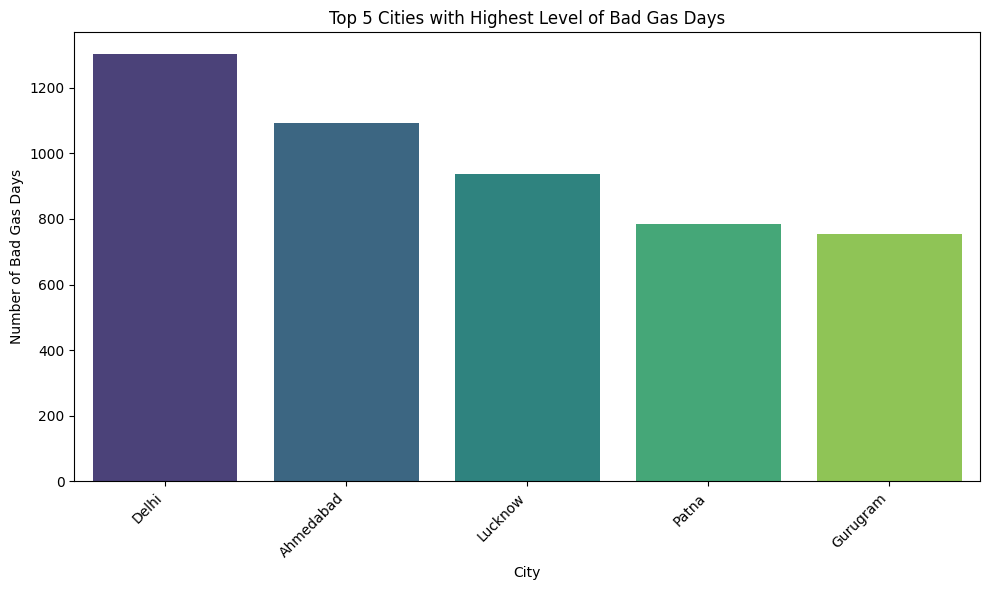

In [ ]:
import matplotlib.pyplot as plt
# Filter data for 'Bad' AQI category (assuming 'AQI_Category' column exists and indicates this)
# If 'AQI_Category' doesn't exist, you might need to define what constitutes 'Bad gas' based on AQI or other columns.
# For this example, let's assume 'AQI_Category' is available and 'Bad' is a valid category.
# If not, you'll need to adjust this filtering logic.
if 'AQI_Category' in df.columns:
  df_bad = df[df['AQI_Category'].isin(['Poor', 'Very Poor', 'Severe'])].copy()
else:
  print("Warning: 'AQI_Category' column not found. Cannot filter for 'Bad gas'.")
  # As a fallback, let's consider a high AQI value as an indicator of bad air quality
  # You'll need to define a threshold based on your understanding of the data
  aqi_threshold_for_bad = 200 # Example threshold, adjust as needed
  df_bad = df[df['AQI'] >= aqi_threshold_for_bad].copy()
  print(f"Filtering based on AQI >= {aqi_threshold_for_bad} as a proxy for 'Bad gas'.")

# Group by city and count the number of 'Bad gas' days
if not df_bad.empty:
  bad_gas_counts = df_bad['City'].value_counts()

  # Get the top 5 cities
  top_5_cities_bad = bad_gas_counts.head(5)

  # Create a bar chart
  plt.figure(figsize=(10, 6))
  sns.barplot(x=top_5_cities_bad.index, y=top_5_cities_bad.values, palette='viridis')
  plt.title('Top 5 Cities with Highest Level of Bad Gas Days')
  plt.xlabel('City')
  plt.ylabel('Number of Bad Gas Days')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()
else:
  print("No data found for 'Bad gas' based on the filtering criteria.")

<Figure size 1400x800 with 0 Axes>

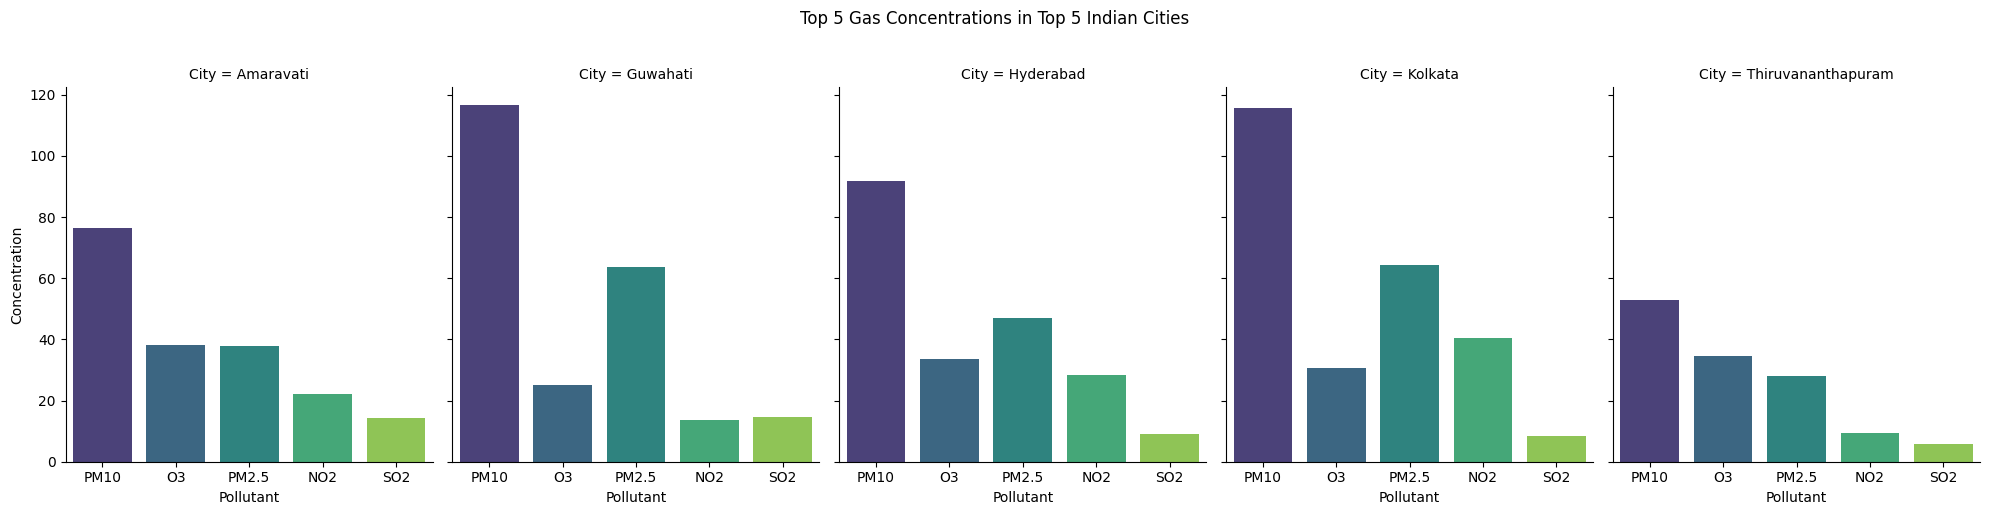

In [ ]:
import matplotlib.pyplot as plt
# Identify the gas components columns. Assuming they are named as standard pollutants.
# You might need to adjust these names based on your dataset's actual column names.
gas_columns = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

# Filter for the top 5 cities identified in the previous steps (either good or bad gas cities)
# We'll use the top 5 cities with the highest number of good gas days for this example.
# You can change this to `top_5_cities_bad` if you want to visualize for the bad gas cities.
cities_to_visualize = top_5_cities.index.tolist()

# Filter the original dataframe to include only the data for these top 5 cities
df_top_5_cities = df[df['City'].isin(cities_to_visualize)].copy()

# Melt the dataframe to have 'City', 'Date', 'Pollutant', and 'Concentration' columns
df_melted = df_top_5_cities.melt(
    id_vars=['City', 'Date'],
    value_vars=gas_columns,
    var_name='Pollutant',
    value_name='Concentration'
)

# Group by City and Pollutant, then calculate the mean concentration
mean_concentrations = df_melted.groupby(['City', 'Pollutant'])['Concentration'].mean().reset_index()

# Find the top 5 pollutants for each city based on mean concentration
def get_top_5_pollutants(df_city):
  return df_city.nlargest(5, 'Concentration')

top_5_pollutants_per_city = mean_concentrations.groupby('City').apply(get_top_5_pollutants).reset_index(drop=True)

# Create a categorical distribution plot (bar plot) for the top 5 gases in each of the top 5 cities
plt.figure(figsize=(14, 8))
sns.catplot(
    data=top_5_pollutants_per_city,
    x='Pollutant',
    y='Concentration',
    hue='Pollutant',  # Color bars by pollutant type
    col='City',      # Create separate subplots for each city
    kind='bar',
    palette='viridis',
    height=5,
    aspect=0.8
)
plt.suptitle('Top 5 Gas Concentrations in Top 5 Indian Cities', y=1.02)
plt.tight_layout()
plt.show()

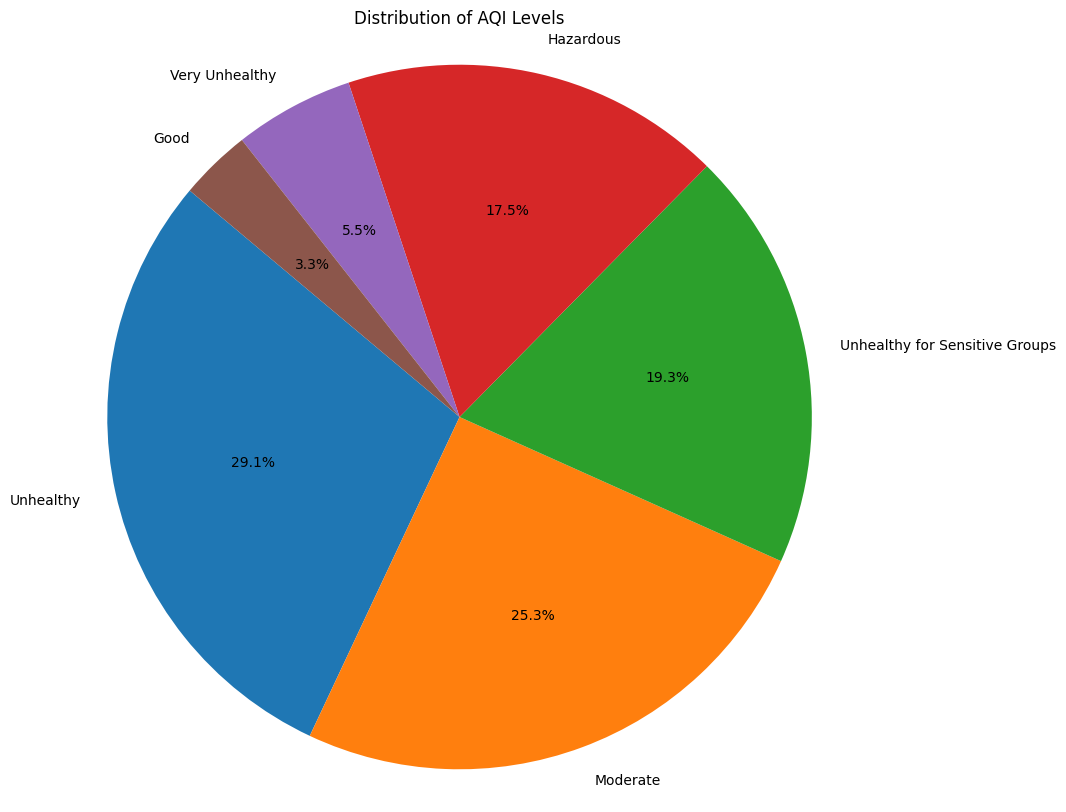

In [ ]:
import matplotlib.pyplot as plt
# Assuming df is already loaded and preprocessed
# For simplicity, let's create some dummy AQI levels based on PM2.5 ranges
# You would replace this with your actual AQI calculation based on the index ranges

# Example AQI level mapping based on PM2.5 values (this is a simplified example)
def get_aqi_level(pm25):
    if pm25 <= 12.0:
        return 'Good'
    elif pm25 <= 35.4:
        return 'Moderate'
    elif pm25 <= 55.4:
        return 'Unhealthy for Sensitive Groups'
    elif pm25 <= 150.4:
        return 'Unhealthy'
    elif pm25 <= 250.4:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Apply the function to create a new column for AQI level
# Make sure 'PM2.5' column exists in your DataFrame
if 'PM2.5' in df.columns:
    df['AQI_Level'] = df['PM2.5'].apply(get_aqi_level)

    # Count the occurrences of each AQI level
    aqi_counts = df['AQI_Level'].value_counts()

    # Create the pie chart for AQI levels
    plt.figure(figsize=(10, 10))
    plt.pie(aqi_counts, labels=aqi_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of AQI Levels')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("PM2.5 column not found in the DataFrame.")

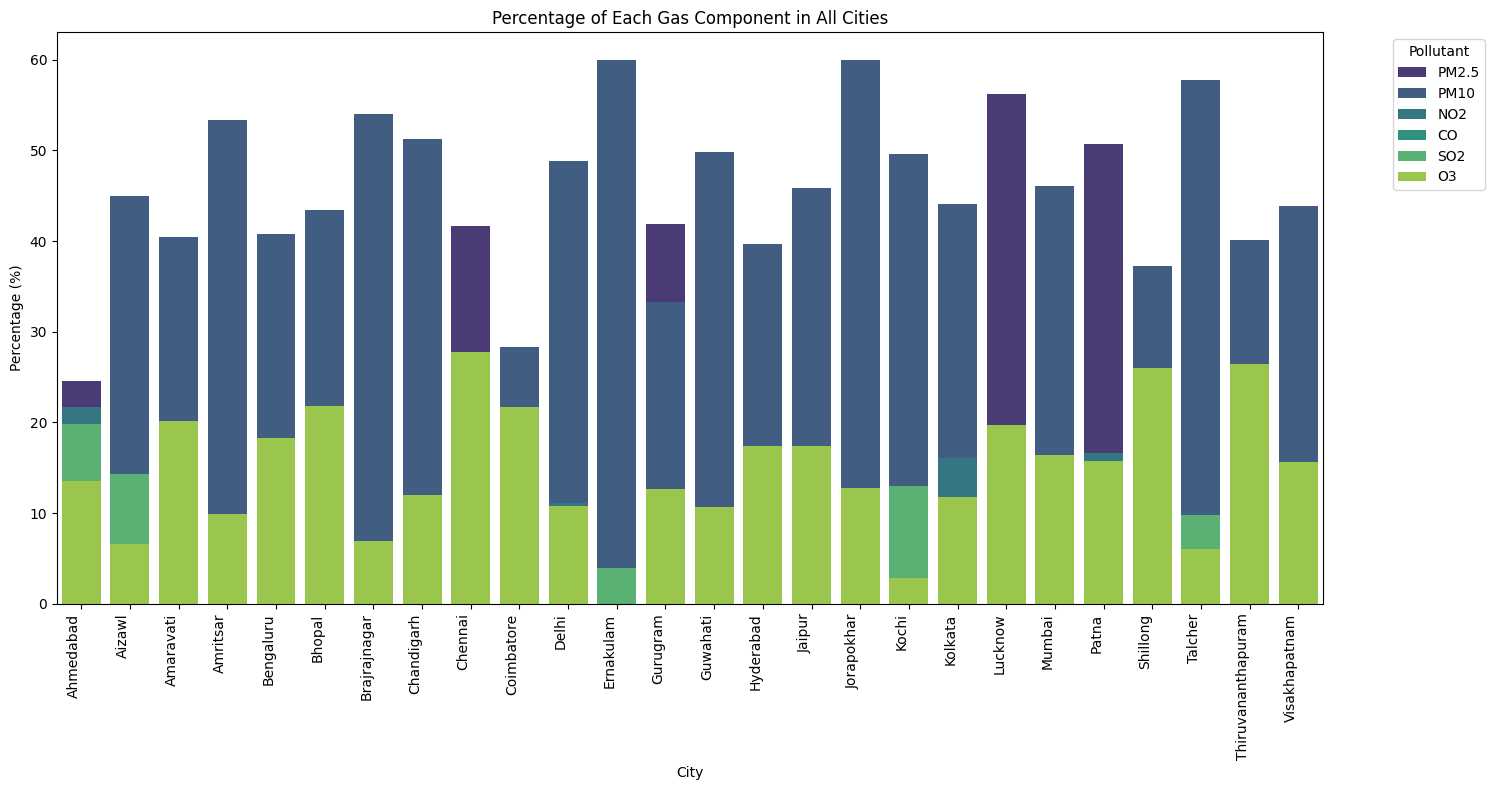

In [ ]:
import matplotlib.pyplot as plt
# Group data by city and calculate the total concentration for each gas component
city_gas_totals = df.groupby('City')[gas_columns].sum()

# Calculate the total concentration across all gases for each city
city_gas_totals['Total'] = city_gas_totals[gas_columns].sum(axis=1)

# Calculate the percentage of each gas component within the total for each city
city_gas_percentages = city_gas_totals[gas_columns].divide(city_gas_totals['Total'], axis=0) * 100

# Reset index to make 'City' a column for easier plotting
city_gas_percentages = city_gas_percentages.reset_index()

# Melt the dataframe to have 'City', 'Pollutant', and 'Percentage' columns
city_gas_percentages_melted = city_gas_percentages.melt(
    id_vars=['City'],
    value_vars=gas_columns,
    var_name='Pollutant',
    value_name='Percentage'
)

# Create a stacked bar chart to visualize gas levels in percentage for each city
plt.figure(figsize=(15, 8))
sns.barplot(
    data=city_gas_percentages_melted,
    x='City',
    y='Percentage',
    hue='Pollutant',
    palette='viridis',
    dodge=False  # Stack the bars
)
plt.title('Percentage of Each Gas Component in All Cities')
plt.xlabel('City')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()